#The Heart Disease Classification
 
##The Question
 
Heart disease is one of the major causes of death within the U.S., often leading to other illnesses. Determining the presence of heart disease in patients early helps to mitigate the long term effects. We can use different Machine Learning models to facilitate early detection of heart disease in patients. We already know that there are a large number of machine learning algorithms in the wild. Occam's Razor tells us simpler models should be selected to prevent overfitting [1]. However, how well do the simple models do and which performs better? How easily are simple models trained?
 
##The Data
 
We obtained the "Heart Failure Prediction Dataset" from a Kaggle project page [3]. The data is real world data collected from hospitals. Our dataset consists of 918 rows of data with 11 patient features. We divided the data into a training set and a test set. We used 70% for our training set and 30% for our testing set. We aim to train three models on the training set to "predict" heart failures on the test set.
 
##The Approach
 
We apply three different machine learning algorithms: KNN, Random Forest, Logistic Regression, in order to get the classifications and compare their differences, such as speed and accuracy.
 
##Our Hypothesis

We guess that Random Forest is the most time-consuming model to train and the most accurate model. We hypothesize that more neighbors in KNN will result in better accuracy and robustness against outliers.
 
##Why Bother?
 
We are curious about how easily it can be to use existing machine learning frameworks to train models to classify data. What’s more, there are practical applications of heart disease prediction in health care.

##Challenges

Data preprocessing is a challenge. To use sklearn to train ML models, we need to be familiar with the structure of our data. We have to encode columns with categorical data and split our feature data from our label data. We also need to understand which parameters can be important for different models and tune them. To use the Sklearn APIs we need to thoroughly understand how to format the parameters and their return values. 


##Tutorial

Before running our project, you (the reader) need to first download the “heart.csv” file from Google Drive and upload it to Google Colab (this document). *(See "Instruction.png" in Google Drive.)*

Here are descriptions of packages we apply in our project:
*   "Sklearn" is the most important library that provides numerous machine learning models. It also offers functions for preprocessing data and listing the classification results. 
*   "Pandas" is "Python Data Analysis Library", it can parse data from csv files.
*   "Matplotlib" and "Seaborn" allow us to create plots and visualize the data.
*   "Numpy" is a nice library in Python to store values inside the matrix.
 
Now, we need to import our data to train and test our model. Let's start off by importing "Pandas" to receive our csv file first.

In [ ]:
import pandas as pd

df = pd.read_csv("heart.csv")

Let's also use the head() function to take a peek at the structure of our data.

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Our table contains features along the columns, and finally with a label for Heart Disease.
The structure of our labeled data allows us to train various ML models like KNN, Random Forrest, and Logistic Regression.

We also can see that our dataset contains categorical data.

For our ML model to be trained, we must encode these categorical values into numerical values.

To transform our categorical data into numerical data, we’ll use sklearn’s LabelEncoder module.

In [ ]:
from sklearn.preprocessing import LabelEncoder
 
#Initialize label encoder objects (1 for each column we need to encode)
le_Sex = LabelEncoder()
le_Chest_Pain_Type = LabelEncoder()
le_Resting_ECG = LabelEncoder()
le_Exercise_Angina = LabelEncoder()
le_ST_Slope = LabelEncoder()
 
#Transform the categorical data to numerical data each of the categorical columns in the dataframe
df["Sex"] = le_Sex.fit_transform(df["Sex"])
df["ChestPainType"] = le_Chest_Pain_Type.fit_transform(df["ChestPainType"])
df["RestingECG"] = le_Resting_ECG.fit_transform(df["RestingECG"])
df["ExerciseAngina"] = le_Exercise_Angina.fit_transform(df["ExerciseAngina"])
df["ST_Slope"] = le_ST_Slope.fit_transform(df["ST_Slope"])
 
df.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Now, all our categorical data has been encoded into numerical data.

Let's split our data so that the Heart Disease column is separated from the features.

We want to modify our table such that column 11, the column that labels the presence of Heart Disease isn't a feature in our ML model.

We want to be able to give our model a row containing columns 0-10 (patient features) and have it "predict" what column 11 should be (does this patient have heart disease?).

We store the first 10 columns, which are the features, into table X.
Then we store column 11 into table y.



In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,11].values

Let's use print to check if it worked.


In [ ]:
print(X)

[[40.   1.   1.  ...  0.   0.   2. ]
 [49.   0.   2.  ...  0.   1.   1. ]
 [37.   1.   1.  ...  0.   0.   2. ]
 ...
 [57.   1.   0.  ...  1.   1.2  1. ]
 [57.   0.   1.  ...  0.   0.   1. ]
 [38.   1.   2.  ...  0.   0.   2. ]]


In [ ]:
print(y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

Now let's divide our dataset into a training set and a testing set.

We use a 70 - 30 split, which is a common ratio to split the data.

So 70% of our dataset will be used to train our model and the remaining 30% will be used to test it.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70)

For good practice, let's do some Feature Scaling on our data set.

This is a very common data preprocessing step that prevents a single feature from unfairly skewing the results.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##K-Nearest Neighbor

Let's use KNN to build our first ML model.
First, let's import the modules we need to implement KNN. We're building 3 models with different values of neighbors to consider to compare their performance.

I picked k to be 5, 100, 200, 225 neighbors. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier1.fit(X_train,y_train)
classifier2 = KNeighborsClassifier(n_neighbors=100)
classifier2.fit(X_train,y_train)
classifier3 = KNeighborsClassifier(n_neighbors=200)
classifier3.fit(X_train,y_train)
classifier4 = KNeighborsClassifier(n_neighbors=225)
classifier4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=225)

Now that our KNN classifier is set up, let's use it on our testing data.

In [ ]:
y_pred1 = classifier1.predict(X_test)
y_pred2 = classifier2.predict(X_test)
y_pred3 = classifier3.predict(X_test)
y_pred4 = classifier4.predict(X_test)

Let's use the "classification_report" library from sklearn to try and measure how well our machine learning model did.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))
print(classification_report(y_test,y_pred2))
print(classification_report(y_test,y_pred3))
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       288
           1       0.86      0.82      0.84       355

    accuracy                           0.82       643
   macro avg       0.82      0.83      0.82       643
weighted avg       0.83      0.82      0.82       643

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       288
           1       0.90      0.78      0.83       355

    accuracy                           0.83       643
   macro avg       0.83      0.83      0.83       643
weighted avg       0.84      0.83      0.83       643

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       288
           1       0.86      0.83      0.85       355

    accuracy                           0.83       643
   macro avg       0.83      0.83      0.83       643
weighted avg       0.83      0.83      0.83       643

              preci

Let's compare how these different parameters perform using some visualization.

ROC curves are a very common way of visualizing the performance of a model. 
You graph a model performance based on two dimensions: 
1. True Positive Rate
2. False Positive Rate

Then you compute the Area Under the Curve (AUC) and compare them against each other. A model with a higher AUC implies better performance.

Going in a diagnoal line from (0,0) to (1,1) represents a naive model.
This represents a model that is correct 50% of the time by naively guessing the correct answer.

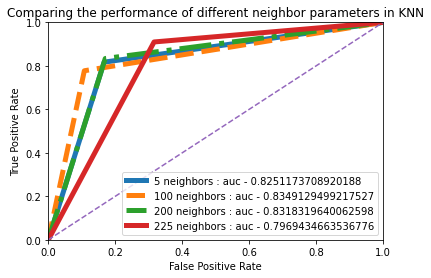

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

## Code for "5 neighbors" line
line_fmt = "-"  #Format of this line as it’s represented in the chart
fpr, tpr, thresholds = roc_curve(y_test,y_pred1) #Assign FalsePositiveRate, TruePositiveRate, Threshold between TruePostiveRate and FalsePositiveRate
auc_score = auc(fpr, tpr) #Computes the area under the curve for this line
label = "5 neighbors : auc - " + str(auc_score) #Label for the legend of the chart
plt.plot(fpr, tpr, line_fmt, linewidth=5, label=label) #Plots the line on our plot object

## Code for "100 neighbors" line
line_fmt = "--"
fpr, tpr, thresholds = roc_curve(y_test,y_pred2)
auc_score = auc(fpr, tpr)
label = "100 neighbors : auc - " + str(auc_score)
plt.plot(fpr, tpr, line_fmt, linewidth=5, label=label)

## Code for "200 neighbors" line
line_fmt = "-."
fpr, tpr, thresholds = roc_curve(y_test,y_pred3)
auc_score = auc(fpr, tpr)
label = "200 neighbors : auc - " + str(auc_score)
plt.plot(fpr, tpr, line_fmt, linewidth=5, label=label)

## Code for "225 neighbors" line
line_fmt = "-"
fpr, tpr, thresholds = roc_curve(y_test,y_pred4)
auc_score = auc(fpr, tpr)
label = "225 neighbors : auc - " + str(auc_score)
plt.plot(fpr, tpr, line_fmt, linewidth=5, label=label)

## Format the chart
plt.title('Comparing the performance of different neighbor parameters in KNN')
plt.legend(loc = "lower right")

plt.plot([0, 1], [0,1,], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Our results demonstrate that 5 neighbors and 100 neighbors have comparable results while 200 and 225 neighbors begins to lose accuracy with a higher False Positive Rate. Even though increasing the number of neighbors improves robustness against outliers, too many neighbors can lead to underfitting.

## Random Forest

Random Forest is an easy-to-use Machine Learning algorithm that produces good results [5]. 

In our example, it randomly selects features, builds a large number of decision trees and let the trees predict heart diseases and make a vote/ an average to obtain a final result. 

The number of trees, i.e. n_estimators, can be important. In this project, we try to investigate how this hyperparameter affects the "prediction" (classification) power by setting it to different values. 

We choose n_estimators to be 100, 500, 1000, 10000, 1, respectively.
The following code produces classification results of different n_estimators.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier1 = RandomForestClassifier(n_estimators=100) # Choose n_estimators to be 100, 500, 1000, 10000, 1, respectively
RFclassifier500 = RandomForestClassifier(n_estimators=500)
RFclassifier2 = RandomForestClassifier(n_estimators=1000)
RFclassifier3 = RandomForestClassifier(n_estimators=10000)
RFclassifier4 = RandomForestClassifier(n_estimators=1)
RFclassifier1.fit(X_train, y_train)
RFclassifier500.fit(X_train, y_train)
RFclassifier2.fit(X_train, y_train)
RFclassifier3.fit(X_train, y_train)
RFclassifier4.fit(X_train, y_train)

# We use the models to classify the test set
rf_pred1 = RFclassifier1.predict(X_test)
rf_pred500 = RFclassifier500.predict(X_test)
rf_pred2 = RFclassifier2.predict(X_test)
rf_pred3 = RFclassifier3.predict(X_test)
rf_pred4 = RFclassifier4.predict(X_test)

# Print the report
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred1))
print(classification_report(y_test,rf_pred500))
print(classification_report(y_test,rf_pred2))
print(classification_report(y_test,rf_pred3))
print(classification_report(y_test,rf_pred4))


              precision    recall  f1-score   support

           0       0.90      0.77      0.83       288
           1       0.84      0.93      0.88       355

    accuracy                           0.86       643
   macro avg       0.87      0.85      0.85       643
weighted avg       0.86      0.86      0.86       643

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       288
           1       0.84      0.92      0.88       355

    accuracy                           0.86       643
   macro avg       0.86      0.85      0.85       643
weighted avg       0.86      0.86      0.86       643

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       288
           1       0.84      0.93      0.88       355

    accuracy                           0.86       643
   macro avg       0.87      0.85      0.86       643
weighted avg       0.86      0.86      0.86       643

              preci

We use some visualizations (AUC) to make the results more illutrative.

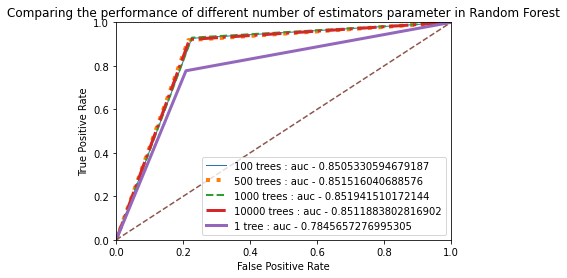

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

## Code for "100 trees" line
line_fmt = "-" #Format of this line as it’s represented in the chart
fpr, tpr, thresholds = roc_curve(y_test,rf_pred1) #Assign FalsePositiveRate, TruePositiveRate, Threshold between TruePostiveRate and FalsePositiveRate
auc_score = auc(fpr, tpr) #Computes the area under the curve for this line
label = "100 trees : auc - " + str(auc_score) #Label for the legend of the chart
plt.plot(fpr, tpr, line_fmt, linewidth=1, label=label) #Plots the line on our plot object

## Code for "500 trees" line
line_fmt = ":"
fpr, tpr, thresholds = roc_curve(y_test,rf_pred500)
auc_score = auc(fpr, tpr)
label = "500 trees : auc - " + str(auc_score)
plt.plot(fpr, tpr, line_fmt, linewidth=4, label=label)

## Code for "1000 trees" line
line_fmt = "--"
fpr, tpr, thresholds = roc_curve(y_test,rf_pred2)
auc_score = auc(fpr, tpr)
label = "1000 trees : auc - " + str(auc_score)
plt.plot(fpr, tpr, line_fmt, linewidth=2, label=label)

## Code for "10000 trees" line
line_fmt = "-."
fpr, tpr, thresholds = roc_curve(y_test,rf_pred3)
auc_score = auc(fpr, tpr)
label = "10000 trees : auc - " + str(auc_score)
plt.plot(fpr, tpr, line_fmt, linewidth=3, label=label)

## Code for "1 tree" line
line_fmt = "-"
fpr, tpr, thresholds = roc_curve(y_test,rf_pred4)
auc_score = auc(fpr, tpr)
label = "1 tree : auc - " + str(auc_score)
plt.plot(fpr, tpr, line_fmt, linewidth=3, label=label)

## Format the chart
plt.title('Comparing the performance of different number of estimators parameter in Random Forest')
plt.legend(loc = "lower right")

plt.plot([0, 1], [0,1,], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Theoretically, with more number of trees, the AUC is higher which means more accurate prediction. However, in reality, there is significant improvement between our 1 tree and 100 trees models but no major difference for the models with trees  >= 100. This implies that there are diminishing returns once we exceed an optimal number of trees. It is also possible that a model with less number of trees can have a higher AUC due to ML algorithms' nondeterministic characteristic.  

## Logistic Regression

Logistic Regression models a binary dependent variable by analyzing more independent features. It is efficient to train since it only considers simple probabilistic definitions [6]. In our project, we decide to tune the parameter C, which means the inverse of regularization strength. The different values of C can influence overfitting or underfitting of data. Through the result, we can see the default of C=1 works the best. The higher the value causes overfitting, while the lower causes underfitting.

In [ ]:
from sklearn import linear_model

#Compare the difference by changing the parameter C in LR
regression1 = linear_model.LogisticRegression()
regression2 = linear_model.LogisticRegression(C=100)
regression3 = linear_model.LogisticRegression(C=0.001)

regression1.fit(X_train, y_train)
regression2.fit(X_train, y_train)
regression3.fit(X_train, y_train)

Y_pred1 = regression1.predict(X_test)
Y_pred2 = regression2.predict(X_test)
Y_pred3 = regression3.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred1))
print(classification_report(y_test,Y_pred2))
print(classification_report(y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       288
           1       0.85      0.86      0.86       355

    accuracy                           0.84       643
   macro avg       0.84      0.84      0.84       643
weighted avg       0.84      0.84      0.84       643

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       288
           1       0.85      0.86      0.86       355

    accuracy                           0.84       643
   macro avg       0.84      0.84      0.84       643
weighted avg       0.84      0.84      0.84       643

              precision    recall  f1-score   support

           0       0.95      0.44      0.60       288
           1       0.68      0.98      0.81       355

    accuracy                           0.74       643
   macro avg       0.82      0.71      0.70       643
weighted avg       0.80      0.74      0.71       643



Below the figure visualizes the data and shows how the library computes the precision, the recall, and so on [8].

[[234  54]
 [ 48 307]]


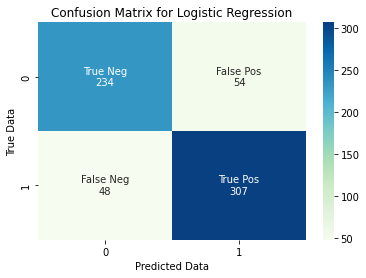

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, Y_pred1)
print(cnf_matrix)


import seaborn as sns
import numpy as np

names = ['True Neg','False Pos','False Neg','True Pos']
cases = [x for x in cnf_matrix.flatten()]

content = [str(i)+'\n'+str(j) for i, j in zip(names,cases)]
content = np.array(content).reshape(2,2)

sns.heatmap(cnf_matrix, annot=content, cmap="GnBu" ,fmt='')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Data')
plt.ylabel('True Data')
plt.show()

#Comparison
We compare all three ML algorithms, using "best" parameters for each algorithm:

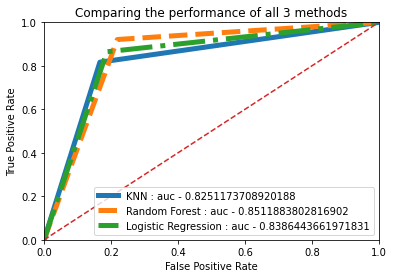

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

## KNN
line_fmt = "-"
fpr, tpr, thresholds = roc_curve(y_test,y_pred1)
auc_score = auc(fpr, tpr)
label = "KNN : auc - " + str(auc_score)
plt.plot(fpr, tpr, line_fmt, linewidth=5, label=label)

## Random Forest
line_fmt = "--"
fpr, tpr, thresholds = roc_curve(y_test,rf_pred3)
auc_score = auc(fpr, tpr)
label = "Random Forest : auc - " + str(auc_score)
plt.plot(fpr, tpr, line_fmt, linewidth=5, label=label)

## Logistic Regression
line_fmt = "-."
fpr, tpr, thresholds = roc_curve(y_test,Y_pred1)
auc_score = auc(fpr, tpr)
label = "Logistic Regression : auc - " + str(auc_score)
plt.plot(fpr, tpr, line_fmt, linewidth=5, label=label)

## Format the chart
plt.title('Comparing the performance of all 3 methods')
plt.legend(loc = "lower right")

plt.plot([0, 1], [0,1,], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Conclusion and Lessons Learned

1. Simple classification models (KNN, Random Forest, Logistic Regression) can do pretty well and are easily trained.
2. ROC Curve indicates that Random Forest gives the best classification performance.
3. Machine Learning model parameters can have a great impact on the efficacy of the model, which vary the bias and variance that lead to overfitting and underfitting. When # of neighbors in KNN becomes too big we see underfitting, where classifying new points just becomes the majority class. When increasing the number of trees used in our Random Forest model we observed that our program becomes significantly slower. Generating 10,000 trees to classify a new data point takes longer than 500 trees. We see that there is significant improvement between our 1 tree and 100 trees models but no major difference for the models with trees  >= 100. This implies that there are diminishing returns once we exceed an optimal number of trees.
4. We also observed that different models have different performance time-wise. For example, KNN and Random Forest are significantly slower than Logistic Regression.
5. We learned that these models have optimal hyperparatemers(e.g. number of neighbors in KNN, number of trees in RF). For example, increasing the number of neighbors helps reduce the effect of outliers but extremely high values can produce underfitting, leading to more false positives. Similarly, the precision and recall of random forest marginally changes when the number of trees becomes exceeds a certain number of trees.

#References
[1] Paea Lependu. CS 205 - 15 ML. https://docs.google.com/presentation/d/1f_EVfG47opczUo62B59_yVmxRp3cnGWIghLb3b7jHu0/edit#slide=id.ga5803557f1_0_88

[2] https://www.youtube.com/watch?v=OO7Y5wQWnQs

[3] https://www.kaggle.com/fedesoriano/heart-failure-prediction

[4] https://www.cdc.gov/heartdisease/facts.htm

[5] https://builtin.com/data-science/random-forest-algorithm

[6] https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

[7] https://realpython.com/logistic-regression-python/

[8] https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

[9] https://www.kaggle.com/mruanova/heart-disease-prediction-random-forest-classifier